In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

일원 분산분석(One-way ANOVA)
- 요인이 하나일 때, 수준 간에 평균 차이를 비교
- 일반적으로 요인의 수준은 3개

In [3]:
# 작업 디렉토리 변경
import os
os.chdir('c:/data/exam_python')

In [5]:
# 데이터 불러오기

pro_rate1 = pd.read_csv('기계1.csv')
pro_rate1

,Company,Product
0,A,6.00
1,B,5.02
2,C,5.51
3,A,6.08
4,B,4.98
5,C,5.50
6,A,6.06
7,B,4.95
8,C,5.62
9,A,5.92


In [6]:
# 분산분석을 위한 라이브러리 호출

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

1. statsmodels.fomula.api : 수식(formula) 기반의 모델을 호출
- ols : 회귀분석 기반

2. statsmodels.stats.anova : 통계분석 방법 중에 ANOVA를 사용
- anova_lm : 분산분석을 모형화

In [7]:
# 일원분산분석 수행

model = ols('Product ~ C(Company)', pro_rate1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Company),2.0,2.62576,1.31288,242.228782,1.994319e-10
Residual,12.0,0.06504,0.00542,NaN,NaN


In [9]:
# 잔차그림을 그리기 위해 변수 생성

pro_rate1['residual'] = model.resid      # 잔차 : resid
pro_rate1['fitted'] = model.fittedvalues # 적합치 : fitteed values
pro_rate1

,Company,Product,residual,fitted
0,A,6.00,-3.552714e-15,6.000
1,B,5.02,4.400000e-02,4.976
2,C,5.51,-1.400000e-02,5.524
3,A,6.08,8.000000e-02,6.000
4,B,4.98,4.000000e-03,4.976
5,C,5.50,-2.400000e-02,5.524
6,A,6.06,6.000000e-02,6.000
7,B,4.95,-2.600000e-02,4.976
8,C,5.62,9.600000e-02,5.524
9,A,5.92,-8.000000e-02,6.000


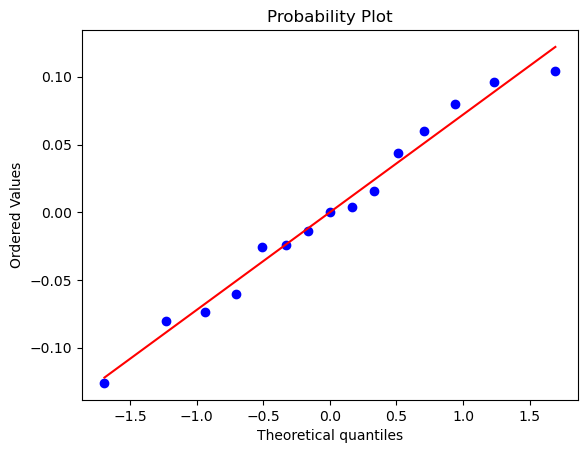

In [10]:
# 1. 정규성 확인(Normality)

from statsmodels.stats.diagnostic import normal_ad # 정규성 검정 호출

stats.probplot(pro_rate1['residual'], plot = plt)
plt.show()

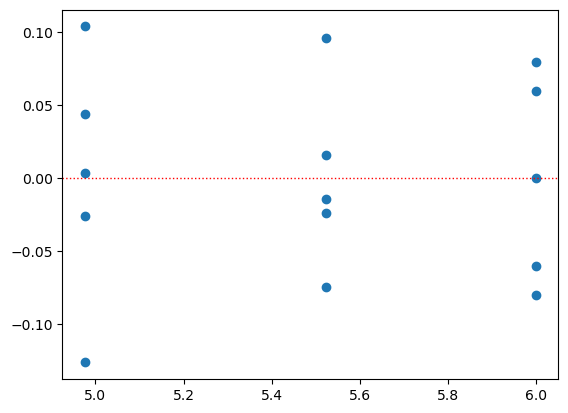

In [15]:
# 2. 등분산성(Eaual Variance) 확인
# axhline : 기준선을 긋는 명령어

plt.scatter(pro_rate1['fitted'], pro_rate1['residual'])
plt.axhline(y = 0, color = 'r', linewidth = 1, linestyle = 'dotted')
plt.show()

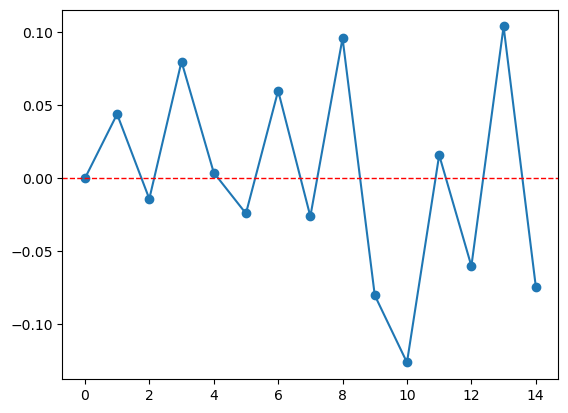

In [22]:
# 독립성(Indipendence)
# plt.plot : 선 그래프를 그리는 함수
plt.scatter(pro_rate1.index, pro_rate1['residual'])
plt.plot(pro_rate1['residual'])
plt.axhline(y = 0, color = 'r', linewidth = 1, linestyle = '--')
plt.show()

In [27]:
# 사후검정(다중비교) - Post-Hoc

from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukey에 쌍별 비교

hsd = pairwise_tukeyhsd(pro_rate1['Product'], pro_rate1['Company'])
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-1.024,0.0,-1.1482,-0.8998,True
A,C,-0.476,0.0,-0.6002,-0.3518,True
B,C,0.548,0.0,0.4238,0.6722,True


In [28]:
# 그룹 별 평균 확인하기
pro_rate1.groupby(['Company']).mean()

,Product,residual,fitted
Company,,,
A,6.000,-3.552714e-15,6.000
B,4.976,-1.776357e-15,4.976
C,5.524,-3.552714e-15,5.524


이원분산분석(Two-way ANOVA)
- 두 개의 요인을 고려하여 분산분석 수행
- 하나의 인자가 y에 영향을 미치는 정도 : 주효과
- 두 개 인자 간에 결합효과 : 교호효과(DOE에서 명확하게 확인이 가능하다)

In [30]:
# 데이터 불러오기(이원분산분석)

twoway = pd.read_csv('twowayanova.csv', encoding = 'euc-kr')
twoway

,회사명,근로자,생산량
0,A,1,6.00
1,B,1,5.02
2,C,1,5.51
3,A,2,6.08
4,B,2,4.98
5,C,2,5.50
6,A,3,6.06
7,B,3,4.95
8,C,3,5.62
9,A,4,5.92


In [31]:
# 이원분산분석 수행

model2 = ols('생산량 ~ C(회사명) + C(근로자)', twoway).fit()
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(회사명),2.0,2.625760,1.312880,230.464599,8.470925e-08
C(근로자),4.0,0.019467,0.004867,0.854301,5.296549e-01
Residual,8.0,0.045573,0.005697,NaN,NaN


In [32]:
# 이원분산분석 수행(2차 교호작용 고려)

model2 = ols('생산량 ~ C(회사명) * C(근로자)', twoway).fit()
anova_lm(model2)

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


,df,sum_sq,mean_sq,F,PR(>F)
C(회사명),2.0,2.625760e+00,1.312880,0.0,NaN
C(근로자),4.0,1.946667e-02,0.004867,0.0,NaN
C(회사명):C(근로자),8.0,4.557333e-02,0.005697,0.0,NaN
Residual,0.0,2.161479e-28,inf,NaN,NaN


In [33]:
# 데이터 불러오기(단순회귀분석)

advertising = pd.read_csv('광고비.csv')
advertising

,Cost,Sales
0,41,210
1,22,150
2,27,170
3,60,250
4,85,300
5,41,210
6,90,320
7,80,280
8,75,250


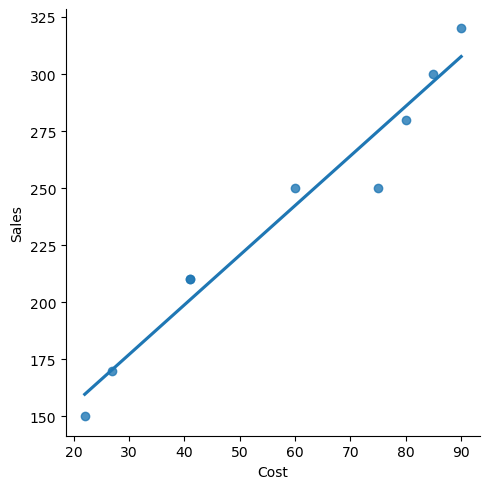

In [35]:
# 두 변수 간에 관계 파악
# sns.lmplot : 산점도에 회귀직선 추가
sns.lmplot(x = 'Cost', y = 'Sales', ci = None, data = advertising)
plt.show()

In [37]:
# 단순회귀분석 수행

reg = smf.ols('Sales ~ Cost', advertising).fit()
reg.summary()

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.80e-06
Time:                        14:45:30   Log-Likelihood:                -34.544
No. Observations:                   9   AIC:                             73.09
Df Residuals:                       7   BIC:                             73.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.7708     10.929     10.227      0.000      85.927     137.615
Cost           2.1767      0.174     12.513      0.000       1.765       2.588
==============================================================================
Omnibus:                        3.987   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                1.551
Skew:                          -1.016   Prob(JB):                        0.460
Kurtosis:                       3.077   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# 다중회귀분석 데이터 불러오기

survival = pd.read_csv('survival.csv')
survival.head()

,Y,X1,X2,X3,X4
0,200,6.7,62,81,2.59
1,101,5.1,59,66,1.70
2,204,7.4,57,83,2.16
3,101,6.5,73,41,2.01
4,509,7.8,65,115,4.30


In [40]:
# X와 Y간에 다중공선성이 있는지 그리고 변수 간에 상관성을 보기 위해 상관계수 산출

print(survival.corr())

           Y        X1        X2        X3        X4
Y   1.000000  0.372519  0.553976  0.580244  0.722327
X1  0.372519  1.000000  0.090120 -0.149634  0.502416
X2  0.553976  0.090120  1.000000 -0.023605  0.369026
X3  0.580244 -0.149634 -0.023605  1.000000  0.416425
X4  0.722327  0.502416  0.369026  0.416425  1.000000


In [41]:
# 다중회귀분석 수행

reg2 = smf.ols('Y ~ X1 + X2 + X3 +X4', data = survival).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     62.79
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.12e-18
Time:                        16:07:32   Log-Likelihood:                -296.04
No. Observations:                  54   AIC:                             602.1
Df Residuals:                      49   BIC:                             612.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -621.5976     64.800     -9.592      0.000    -751.819    -491.376
X1            33.1638      7.017      4.726      0.000      19.062      47.266
X2             4.2719      0.563      7.582      0.000       3.140       5.404
X3             4.1257      0.511      8.071      0.000       3.099       5.153
X4            14.0916     12.525      1.125      0.266     -11.079      39.262
==============================================================================
Omnibus:                       67.426   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.889
Skew:                           3.304   Prob(JB):                    3.34e-136
Kurtosis:                      18.284   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# 유의하지 않은 X4를 모형에서 제거

reg2 = smf.ols('Y ~ X1 + X2 + X3', data = survival).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     82.85
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           2.08e-19
Time:                        16:22:07   Log-Likelihood:                -296.73
No. Observations:                  54   AIC:                             601.5
Df Residuals:                      50   BIC:                             609.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -659.1794     55.674    -11.840      0.000    -771.004    -547.355
X1            38.3227      5.326      7.196      0.000      27.625      49.020
X2             4.5677      0.500      9.144      0.000       3.564       5.571
X3             4.4850      0.400     11.208      0.000       3.681       5.289
==============================================================================
Omnibus:                       62.167   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.590
Skew:                           3.021   Prob(JB):                    5.92e-106
Kurtosis:                      16.374   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""